In [ ]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import cross_validate
import itertools
import xgboost as xgb
from sklearn.svm import LinearSVC

from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

import matplotlib
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn import svm
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install sklearn_crfsuite
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 965 kB 4.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 5.0 MB/s 
     |████████████████████████████████| 86 kB 5.5 MB/s 
     |████████████████████████████████| 6.6 MB 40.8 MB/s 
     |████████████████████████████████| 596 kB 30.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from math import sqrt
import regex as re
import os
from glob import glob

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support, mean_squared_error, accuracy_score

import sklearn_crfsuite
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics
from sklearn.naive_bayes import BernoulliNB
import scipy

import torch
import transformers as ppb
import warnings

from xgboost import XGBClassifier, XGBRFClassifier, XGBRegressor, XGBRFRegressor
from xgboost import plot_importance
from xgboost import plot_importance
from matplotlib import pyplot as plt

In [ ]:
from numpy import load
# load array
x_train_text = load('/content/drive/MyDrive/fasttextvectors_train.npy')
y_train_text = load('/content/drive/MyDrive/labelstext_train.npy')
print(x_train_text.shape, y_train_text.shape)

(108, 300) (108,)


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/train108.csv')
docs = df['doc_text']
y = df['labels']
trainX = docs

In [ ]:
ytam=pd.read_csv('/content/drive/MyDrive/train108.csv')
y_train_mmse=ytam['mmse']

In [ ]:
y_train_mmse


0       30
1       30
2       29
3       30
4       30
      ... 
103     20
104     24
105     12
106     20
107     13
Name: mmse, Length: 108, dtype: object

In [ ]:
def get_results(X,y):
    values = {}
    scoring = {
        'acc':'accuracy',
        'f1':'f1_macro'
    }
    clf = MLPClassifier(n_iter_no_change=50, max_iter=10000,hidden_layer_sizes=(512, ))
    res = cross_validate(clf, X, y, cv=10,  return_train_score=True, scoring=scoring) 
    acc = res['test_acc']
    f1 = res['test_f1']
    
    print()
    values['mlp_acc'] = acc.mean()
    values['mlp_f1'] = f1.mean()
    print("MLP")
    print("Accuracy: %f" %(acc.mean()))
    print("F1 Score: %f" %(f1.mean()))

    clf = BernoulliNB()
    res = cross_validate(clf, X, y, cv=10,  return_train_score=True, scoring=scoring)  
    acc = res['test_acc']
    f1 = res['test_f1']
    
    print()
    values['nb_acc'] = acc.mean()
    values['nb_f1'] = f1.mean()
    print("Naive Bayes")
    print("Accuracy: %f" %(acc.mean()))
    print("F1 Score: %f" %(f1.mean()))

    
    clf = LogisticRegression(max_iter=1000)
    res = cross_validate(clf, X, y, cv=10,  return_train_score=True, scoring=scoring) 
    acc = res['test_acc']
    f1 = res['test_f1']
    print()
    values['lr_acc'] = acc.mean()
    values['lr_f1'] = f1.mean()
    print("Logistic Regression")
    print("Accuracy: %f" %(acc.mean()))
    print("F1 Score: %f" %(f1.mean()))

    
    clf = svm.SVC(kernel='poly', degree=2)
    res = cross_validate(clf, X, y, cv=10,  return_train_score=True, scoring=scoring)  
    acc = res['test_acc']
    f1 = res['test_f1']
    print()
    values['svm_acc'] = acc.mean()
    values['svm_f1'] = f1.mean()
    print("SVM")
    print("Accuracy: %f" %(acc.mean()))
    print("F1 Score: %f" %(f1.mean()))
    
    clf = RandomForestClassifier(n_estimators=1000,n_jobs=-1)
    res = cross_validate(clf, X, y, cv=10,  return_train_score=True, scoring=scoring)  
    acc = res['test_acc']
    f1 = res['test_f1']
    print()
    values['rf_acc'] = acc.mean()
    values['rf_f1'] = f1.mean()
    print("Random Forest")
    print("Accuracy: %f" %(acc.mean()))
    print("F1 Score: %f" %(f1.mean()))
    print()
    print()
    return values
    

BERT

In [ ]:
# Embedding function
def bert_embedding(text: pd.Series, tokenizer, model):
    tokenized = text.apply((lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=512)))
    max_len = max([len(i) for i in tokenized.values])
    padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
    attention_mask = np.where(padded != 0, 1, 0)
    input_ids = torch.tensor(padded)  
    attention_mask = torch.tensor(attention_mask)
    last_hidden_states = model(input_ids, attention_mask=attention_mask)
    last_hidden_states = last_hidden_states[0]
    features = last_hidden_states[:,0,:].numpy()
    return features, attention_mask

In [ ]:
def load_transformer_model_tokenizer(model_class, tokenizer_class, pretrained_weights):
    tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
    model = model_class.from_pretrained(pretrained_weights)
    return tokenizer, model

In [ ]:
def run_model(model_class, tokenizer_class, pretrained_weights, text):
    tokenizer, model = load_transformer_model_tokenizer(model_class, tokenizer_class, pretrained_weights)
    features, _ = bert_embedding(text, tokenizer, model)
    return tokenizer, model, features

In [ ]:
# Distil BERT
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')
tokenizer, model, features = run_model(model_class, tokenizer_class, pretrained_weights, trainX)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the 

In [ ]:
features.shape

(108, 768)

In [ ]:
distilbertemb=features

In [ ]:
get_results(distilbertemb,y)


MLP
Accuracy: 0.804545
F1 Score: 0.798016

Naive Bayes
Accuracy: 0.776364
F1 Score: 0.771297

Logistic Regression
Accuracy: 0.822727
F1 Score: 0.815106

SVM
Accuracy: 0.813636
F1 Score: 0.811022

Random Forest
Accuracy: 0.832727
F1 Score: 0.829483




{'lr_acc': 0.8227272727272726,
 'lr_f1': 0.8151060051060052,
 'mlp_acc': 0.8045454545454545,
 'mlp_f1': 0.798015873015873,
 'nb_acc': 0.7763636363636364,
 'nb_f1': 0.7712970362970364,
 'rf_acc': 0.8327272727272728,
 'rf_f1': 0.8294830169830169,
 'svm_acc': 0.8136363636363637,
 'svm_f1': 0.811021756021756}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 50, max_depth = 5, random_state = 8).fit(distilbertemb, y_train_mmse)
y_pred=rf.predict(distilbertemb)
print("RMSE : ",np.sqrt(mean_squared_error(y_train_mmse,y_pred)))

RMSE : 6.0222050567935037


In [ ]:

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(distilbertemb, y_train_mmse)
y_pred=regr.predict(distilbertemb)
print("RMSE : ",np.sqrt(mean_squared_error(y_train_mmse,y_pred)))

RMSE : 6.3026203459082396


TEST SET


In [ ]:
test = pd.read_csv('/content/drive/MyDrive/test108crct.csv')
testX = test['doc_text']
y_test=test['labels']

In [ ]:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')
tokenizer, model, features = run_model(model_class, tokenizer_class, pretrained_weights, testX)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the 

In [ ]:
ad_dict = {'NON-AD': 0,
                'AD': 1}

ad_keys = list(['NON-AD', 'AD'])


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def one_hot_encoder(true_labels, num_records, num_classes):
    temp = np.array(true_labels[:num_records])
    true_labels = np.zeros((num_records, num_classes))
    true_labels[np.arange(num_records), temp] = 1
    return true_labels

def display_results(y_test, pred_probs, cm=True):
    pred = np.argmax(pred_probs, axis=-1)
    one_hot_true = one_hot_encoder(y_test, len(pred), len(ad_dict))
    print('Test Set Accuracy =  {0:.3f}'.format(accuracy_score(y_test, pred)))
    print('Test Set F1-score =  {0:.3f}'.format(f1_score(y_test, pred, average='macro')))
    print('Test Set Precision =  {0:.3f}'.format(precision_score(y_test, pred, average='macro')))
    print('Test Set Recall =  {0:.3f}'.format(recall_score(y_test, pred, average='macro')))
    if cm:
        plot_confusion_matrix(confusion_matrix(y_test, pred), classes=ad_keys)

In [ ]:
test_distilbert=features
test_distilbert.shape

(48, 768)

In [ ]:
ytestam=pd.read_csv('/content/drive/MyDrive/test108crct.csv')
y_test_mmse=ytestam['mmse']

Test Set Accuracy =  0.792
Test Set F1-score =  0.790
Test Set Precision =  0.800
Test Set Recall =  0.792
Confusion matrix
[[21  3]
 [ 7 17]]


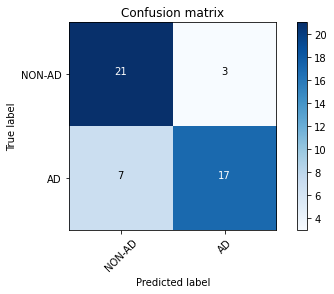

In [ ]:

rf_clf = RandomForestClassifier(n_estimators=1000,n_jobs=-1)
rf_clf.fit(distilbertemb, y)

pred_probs = rf_clf.predict_proba(test_distilbert)
display_results(y_test, pred_probs)

In [ ]:
y_test.shape

(48,)

Test Set Accuracy =  0.792
Test Set F1-score =  0.791
Test Set Precision =  0.794
Test Set Recall =  0.792
Confusion matrix
[[20  4]
 [ 6 18]]


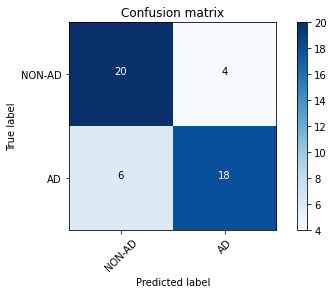

In [ ]:

clf =  MLPClassifier(n_iter_no_change=50, max_iter=10000,hidden_layer_sizes=(512, ))
clf.fit(distilbertemb, y)

pred_probs = clf.predict_proba(test_distilbert)
display_results(y_test, pred_probs)

Test Set Accuracy =  0.750
Test Set F1-score =  0.750
Test Set Precision =  0.762
Test Set Recall =  0.762
Confusion matrix
[[18  3]
 [ 9 18]]


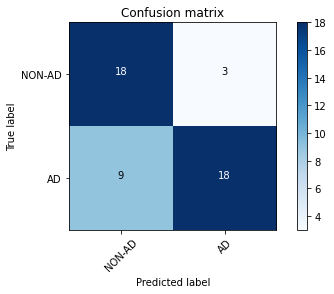

In [ ]:
clf =  LogisticRegression(max_iter=500)
clf.fit(distilbertemb, y)
pred_probs = clf.predict_proba(test_distilbert)
display_results(y_test, pred_probs)

In [ ]:
#distilbert
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, max_depth = 5, random_state = 8).fit(distilbertemb, y_train_mmse)
y_pred=rf.predict(test_distilbert)
print("RMSE : ",np.sqrt(mean_squared_error(y_test_mmse,y_pred)))

RMSE :  5.018409065447369


In [ ]:
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(distilbertemb, y_train_mmse)
y_pred=regr.predict(test_distilbert)
print("RMSE : ",np.sqrt(mean_squared_error(y_test_mmse,y_pred)))

RMSE :  4.877475732983708


hybrid

In [ ]:
fasttextemb=load('/content/drive/MyDrive/fasttextvectors_train.npy')
bertemb = features


In [ ]:

hybridemb=np.concatenate((fasttextemb,bertemb), axis=1)

In [ ]:
hybridemb.shape

(108, 1068)

In [ ]:
np.save('fasttext+bert',hybridemb)

In [ ]:
get_results(hybridemb,y)


MLP
Accuracy: 0.786364
F1 Score: 0.778750

Naive Bayes
Accuracy: 0.814545
F1 Score: 0.807859

Logistic Regression
Accuracy: 0.822727
F1 Score: 0.815106

SVM
Accuracy: 0.813636
F1 Score: 0.811022

Random Forest
Accuracy: 0.860000
F1 Score: 0.857117




{'lr_acc': 0.8227272727272726,
 'lr_f1': 0.8151060051060052,
 'mlp_acc': 0.7863636363636364,
 'mlp_f1': 0.7787501387501388,
 'nb_acc': 0.8145454545454545,
 'nb_f1': 0.8078585303585303,
 'rf_acc': 0.86,
 'rf_f1': 0.857117327117327,
 'svm_acc': 0.8136363636363637,
 'svm_f1': 0.811021756021756}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 50, max_depth = 5, random_state = 8).fit(distilbertemb, y_train_mmse)
y_pred=rf.predict(test_distilbert)
print("RMSE : ",np.sqrt(mean_squared_error(y_test_mmse,y_pred)))

RMSE :  4.9052907563742485


test set-hybrid

In [ ]:
from numpy import load

x_test_text = load('/content/drive/MyDrive/fasttext_test.npy')
y_test_text = load('/content/drive/MyDrive/labeltext_test.npy')
print(x_test_text.shape, y_test_text.shape)

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/test108crct.csv')



X_test_ = test['doc_text']

In [ ]:
tmodel_class, ttokenizer_class, tpretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')
ttokenizer, tmodel, tfeatures = run_model(model_class, tokenizer_class, pretrained_weights, X_test_)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the 

In [ ]:
tfeatures.shape

(48, 768)

In [ ]:
fasttextemb_test=load('/content/drive/MyDrive/fasttext_test.npy')
bertemb_test = tfeatures
hybridemb_test=np.concatenate((fasttextemb_test,bertemb_test), axis=1)

In [ ]:
hybridemb_test.shape

(48, 1068)

In [ ]:
np.save("fasttext+bert_test",hybridemb_test)